# Classification Tutorial
Classification is one of the most important tasks in machine learning. In this notebook, we will attempt to classifify handwritten digits 0-9 using logistic regression and convolutional neural networks.

We'll use [MNIST](http://yann.lecun.com/exdb/mnist/), a famous dataset of 70,000 handwritten digits saved as 28x28 images. It's often used for the "hello world" type tutorials in machine learning.

## Setup
Let's begin by loading in our libraries and dataset

In [33]:
%matplotlib inline
import numpy as np
import matplotlib
import seaborn as sn
import pandas as pd
import tensorflow.examples.tutorials.mnist.input_data as input_data

from matplotlib import pyplot as plt
from sklearn.datasets import fetch_mldata
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
mnist = input_data.read_data_sets('MNIST')
mnist

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST/train-labels-idx1-ubyte.gz
Extracting MNIST/t10k-images-idx3-ubyte.gz
Extracting MNIST/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x1204e0320>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x120506748>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x120506860>)

The MNIST dataset is already split into train and test for us.

In [3]:
X_train = mnist.train.images
y_train = mnist.train.labels

X_test = mnist.test.images
y_test = mnist.test.labels

In [4]:
X_train.shape

(55000, 784)

In [5]:
len(X_test)

10000

In [14]:
sample = X_train[4000]
sample.shape

(784,)

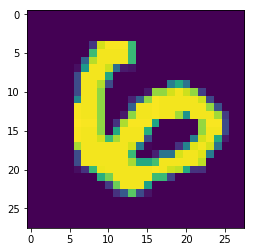

In [15]:
sample_image = sample.reshape((28, 28))
plt.imshow(sample_image)

In [19]:
y_train[4000]

6

## Logistic Regression
The first algorithm we'll use is [logistic regression](http://ml-cheatsheet.readthedocs.io/en/latest/logistic_regression.html). It's similar to linear regression except that it returns either 0 or 1 instead of any real number. Our specific implementation will use [stochastic gradient descent](https://towardsdatascience.com/difference-between-batch-gradient-descent-and-stochastic-gradient-descent-1187f1291aa1), a variant of gradient descent. Gradient descent is an extremely important technique in machine learning. Read more about it [here](https://hackernoon.com/gradient-descent-aynk-7cbe95a778da).

Alpha refers to the learning rate for the gradient descent algorithm. Setting low alphas will make the algorithm learn slowly and setting high alphas will not allow the algorithm to converge. Rather than trying a bunch of alphas one by one, we'll use the model selection algorithm [Grid Search](http://blog.kaggle.com/2015/07/16/scikit-learn-video-8-efficiently-searching-for-optimal-tuning-parameters/)

In [16]:
alphas = np.array([0.1,0.01,0.001,0.0001])

In [17]:
sgd_classifier = SGDClassifier()
grid = GridSearchCV(estimator=sgd_classifier, param_grid=dict(alpha=alphas))
grid.fit(X_train, y_train)
grid

GridSearchCV(cv=None, error_score='raise',
       estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([0.1   , 0.01  , 0.001 , 0.0001])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [20]:
grid.score(X_test, y_test)

0.9039

In [22]:
grid.predict(sample.reshape(1,-1))

array([6], dtype=uint8)

In [23]:
y_train_pred = cross_val_predict(sgd_classifier, X_train, y_train, cv=3)
conf_matrix = confusion_matrix(y_train, y_train_pred)
conf_matrix

array([[5219,    3,   42,   18,   24,   48,   50,   14,   22,    4],
       [   0, 5896,   45,    8,    9,   44,    8,   10,  154,    5],
       [  38,   53, 4830,   52,   92,   27,   97,   82,  184,   15],
       [  42,   38,  290, 4522,   13,  318,   53,   61,  234,   67],
       [  15,   36,   29,   12, 4845,   19,   71,   22,  119,  139],
       [  66,   25,   67,  165,  117, 4036,  134,   37,  299,   41],
       [  45,   23,   54,    4,   54,   86, 5102,    8,   40,    1],
       [  34,   44,   97,   31,   98,   25,    7, 5247,   25,  107],
       [  44,  159,  155,  116,  100,  250,   60,   49, 4394,   62],
       [  35,   58,   37,  101,  523,  136,    7,  308,  148, 4101]])

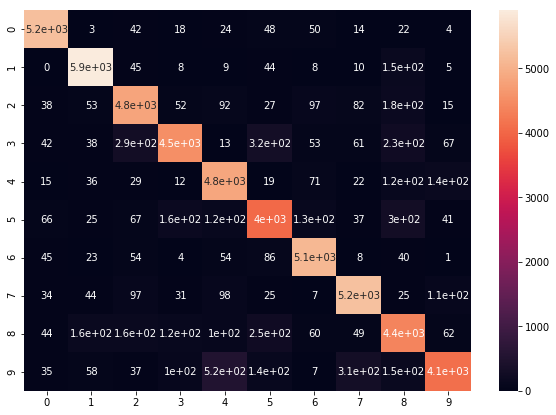

In [24]:
df_cm = pd.DataFrame(conf_matrix, index = [i for i in range(0, 10)],
                  columns = [i for i in range(0, 10)])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

## Convolutional Neural Networks
We'll talk more about CNNs next week but here's a preview of where we're heading:

In [25]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.layers.advanced_activations import LeakyReLU 
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
from tensorflow.python.client import device_lib
from keras import optimizers

device_lib.list_local_devices()

Using TensorFlow backend.


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 6705543363551962916]

In [26]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train/=255
X_test/=255

In [27]:
number_of_classes = 10

Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

In [28]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(28,28,1)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3, 3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

# Fully connected layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))

model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
__________

In [29]:
sgd = optimizers.SGD(lr=0.01, clipnorm=1.)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [30]:
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)
test_gen = ImageDataGenerator()

In [31]:
train_generator = gen.flow(X_train, Y_train, batch_size=64)
test_generator = test_gen.flow(X_test, Y_test, batch_size=64)

In [32]:
model.fit_generator(train_generator, steps_per_epoch=60000//64, epochs=20, 
                    validation_data=test_generator, validation_steps=10000//64)

Epoch 1/20
937/937 [==============================] - 198s 212ms/step - loss: 1.0237 - acc: 0.6888 - val_loss: 0.2130 - val_acc: 0.9520
Epoch 2/20
937/937 [==============================] - 195s 208ms/step - loss: 0.3359 - acc: 0.9079 - val_loss: 0.1582 - val_acc: 0.9573
Epoch 3/20
937/937 [==============================] - 194s 207ms/step - loss: 0.2118 - acc: 0.9399 - val_loss: 0.0983 - val_acc: 0.9734
Epoch 4/20
937/937 [==============================] - 192s 205ms/step - loss: 0.1607 - acc: 0.9545 - val_loss: 0.1499 - val_acc: 0.9595
Epoch 5/20
937/937 [==============================] - 192s 205ms/step - loss: 0.1343 - acc: 0.9617 - val_loss: 0.0631 - val_acc: 0.9809
Epoch 6/20
937/937 [==============================] - 194s 207ms/step - loss: 0.1131 - acc: 0.9673 - val_loss: 0.0494 - val_acc: 0.9881
Epoch 7/20
937/937 [==============================] - 200s 213ms/step - loss: 0.0998 - acc: 0.9712 - val_loss: 0.0699 - val_acc: 0.9809
Epoch 8/20
937/937 [============================

In [35]:
model.evaluate(X_test, Y_test)

10000/10000 [==============================] - 7s 654us/step


[0.2666008021533489, 0.9141]